### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Part 1: Linear regression using Python

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [3]:
# Load the CSV file(s) as reviews.
df = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
df.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [7]:
# Any missing values?
df.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [9]:
# Explore the data.
df.shape

(2000, 11)

In [11]:
# Check for duplicated rows
df.duplicated().sum()

0

In [13]:
# Basic descriptive statistics.
df.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [16]:
# Drop unnecessary columns.
df = df.drop(['language','platform'], axis = 1)

# View column names.
df.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [19]:
# Rename the column headers.
df = df.rename(columns = {
    'remuneration (k£)': 'remuneration',
    'spending_score (1-100)': 'spending_score'})

# View column names.
df.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [22]:
# Create a CSV file as output.
df.to_csv('df_cleaned.csv', index = False)

In [24]:
# Import new CSV file with Pandas.
df1 = pd.read_csv('df_cleaned.csv')

# View DataFrame.
df1.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

In [28]:
# Define independent variable.
y = df1['loyalty_points']

# Define dependent variable.
x = df1['spending_score']

# Create model and print summary of metrics.

# Add constant to x for intercept
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.92e-263
Time:                        22:26:11   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -75.0527     45.931     -1.

In [30]:
# Extract the estimated parameters.
params = model.params
print("Coefficients:\n", params)

# Extract the standard errors.
stderr = model.bse
print("Standard Errors:\n", stderr) 

# Extract the predicted values.
predictions = model.predict(x)
print("Predictions:\n", predictions.head())

Coefficients:
 const            -75.052663
spending_score    33.061693
dtype: float64
Standard Errors:
 const             45.930554
spending_score     0.814419
dtype: float64
Predictions:
 0    1214.353374
1    2602.944491
2     123.317497
3    2470.697718
4    1247.415067
dtype: float64


In [32]:
# Set the X coefficient and the constant to generate the regression table.
slope = params['spending_score']
intercept = model.params.get('const', 0) 
print("Regression equation: loyalty_points = {:.2f} * spending_score + {:.2f}".format(slope, intercept))

# View the output.
print("\nRegression Table")
print("----------------")
print("Intercept:         {:.2f}".format(intercept))
print("Spending Score Coefficient: {:.2f}".format(slope))
print("Standard Error:    {:.2f}".format(stderr['spending_score']))


Regression equation: loyalty_points = 33.06 * spending_score + -75.05

Regression Table
----------------
Intercept:         -75.05
Spending Score Coefficient: 33.06
Standard Error:    0.81


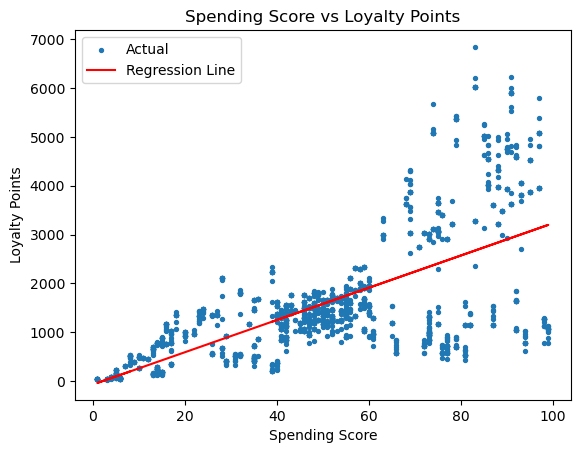

In [34]:
# Plot the graph with a regression line.

plt.scatter(df1['spending_score'], df1['loyalty_points'], s=8, label='Actual')
plt.plot(df1['spending_score'], predictions, color='red', label='Regression Line')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Spending Score vs Loyalty Points')
plt.legend()
plt.show()


### 5b) renumeration vs loyalty

In [37]:
# Define independent variable.
y = df1['loyalty_points']

# Define dependent variable.
x = df1['remuneration']

# Create model and print summary of metrics.

# Add constant to x for intercept
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):          2.43e-209
Time:                        22:26:17   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

In [39]:
# Extract the estimated parameters.
params = model.params
print("Coefficients:\n", params)

# Extract the standard errors.
stderr = model.bse
print("Standard Errors:\n", stderr) 

# Extract the predicted values.
predictions = model.predict(x)
print("Predictions:\n", predictions.head())

Coefficients:
 const          -65.686513
remuneration    34.187825
dtype: float64
Standard Errors:
 const           52.170717
remuneration     0.977925
dtype: float64
Predictions:
 0    354.823741
1    354.823741
2    382.857758
3    382.857758
4    410.891774
dtype: float64


In [41]:
# Set the X coefficient and the constant to generate the regression table.
slope = params['remuneration']
intercept = model.params.get('const', 0)  # if constant is present
print("Regression equation: loyalty_points = {:.2f} * remuneration + {:.2f}".format(slope, intercept))

# View the output.
print("\nRegression Table")
print("----------------")
print("Intercept:         {:.2f}".format(intercept))
print("Remuneration Coefficient: {:.2f}".format(slope))
print("Standard Error:    {:.2f}".format(stderr['remuneration']))


Regression equation: loyalty_points = 34.19 * remuneration + -65.69

Regression Table
----------------
Intercept:         -65.69
Remuneration Coefficient: 34.19
Standard Error:    0.98


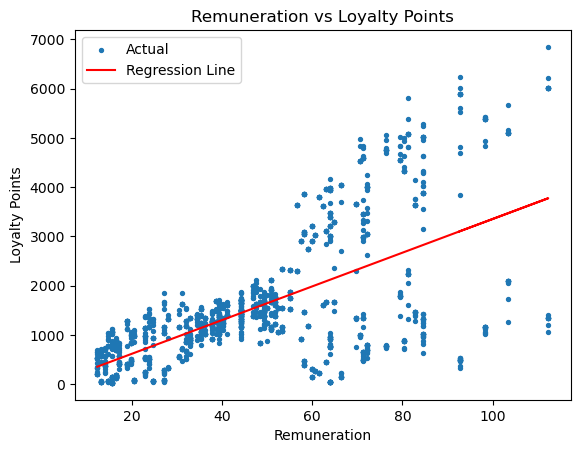

In [43]:
# Plot the graph with a regression line.

plt.scatter(df1['remuneration'], df1['loyalty_points'], s=8, label='Actual')
plt.plot(df1['remuneration'], predictions, color='red', label='Regression Line')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.title('Remuneration vs Loyalty Points')
plt.legend()
plt.show()


### 5c) age vs loyalty

In [46]:
# Define independent variable.
y = df1['loyalty_points']

# Define dependent variable.
x = df1['age']

# Create model and print summary of metrics.

# Add constant to x for intercept
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 12 Apr 2025   Prob (F-statistic):             0.0577
Time:                        22:26:22   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [48]:
# Extract the estimated parameters.
params = model.params
print("Coefficients:\n", params)

# Extract the standard errors.
stderr = model.bse
print("Standard Errors:\n", stderr) 

# Extract the predicted values.
predictions = model.predict(x)
print("Predictions:\n", predictions.head())

Coefficients:
 const    1736.517739
age        -4.012805
dtype: float64
Standard Errors:
 const    88.248731
age       2.113177
dtype: float64
Predictions:
 0    1664.287247
1    1644.223221
2    1648.236026
3    1636.197611
4    1604.095169
dtype: float64


In [50]:
# Set the X coefficient and the constant to generate the regression table.
slope = params['age']
intercept = model.params.get('const', 0)  # if constant is present
print("Regression equation: loyalty_points = {:.2f} * age + {:.2f}".format(slope, intercept))

# View the output.
print("\nRegression Table")
print("----------------")
print("Intercept:         {:.2f}".format(intercept))
print("Age Coefficient: {:.2f}".format(slope))
print("Standard Error:    {:.2f}".format(stderr['age']))


Regression equation: loyalty_points = -4.01 * age + 1736.52

Regression Table
----------------
Intercept:         1736.52
Age Coefficient: -4.01
Standard Error:    2.11


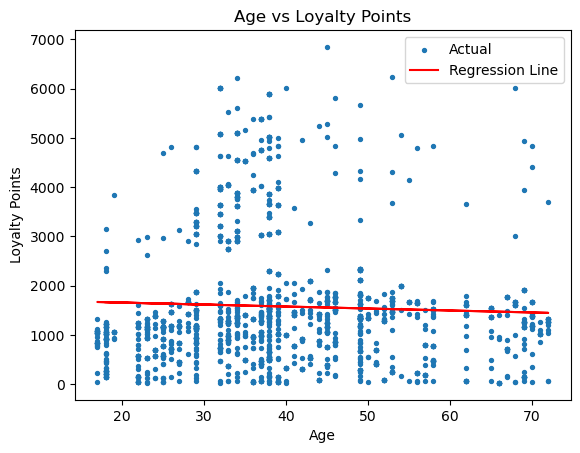

In [52]:
# Plot the graph with a regression line.

plt.scatter(df1['age'], df1['loyalty_points'], s=8, label='Actual')
plt.plot(df1['age'], predictions, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Age vs Loyalty Points')
plt.legend()
plt.show()


## 6. Observations and insights

#### Spending Score vs Loyalty Points 

Spending score is a statistically significant predictor of loyalty points (p < 0.001). The slope of 33 means loyalty points increase by around 33 for each 1-unit rise in spending score. The R-squared value is moderate, but the spread of data suggests other factors also affect loyalty.

#### Remuneration vs Loyalty Points

Remuneration is also statistically significant (p < 0.001), with a slope of 34.19. This means loyalty points go up by about 34 for every 1-unit increase in remuneration. The R-squared value is 0.38, showing a moderate fit. There's still some scatter, so remuneration doesn’t explain loyalty fully.

#### Age vs Loyalty Points

Age is not a statistically significant predictor of loyalty points (p = 0.058). The slope is close to zero (-4.01), and the R-squared value is very low (0.002). This means age has little influence on loyalty compared to other variables.

# Part 2: Exploring the structure using decision trees

## 1. Load and prepare the data

In [58]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [60]:
# Create your new DataFrame.
df2 = pd.read_csv('df_cleaned.csv')
df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [62]:
# Check Education types in the data
df2['education'].unique()

array(['graduate', 'PhD', 'diploma', 'postgraduate', 'Basic'],
      dtype=object)

In [64]:
#The order of the Edu column is meaningful and the order matters, so apply LabelEncoder to this column. 
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d
import pandas as pd
import numpy as np

# Create a class and write a user-defined function.
class MyLabelEncoder(LabelEncoder):
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

# Order lists of the values for the Edu column.
Edu_order = ['Basic', 'diploma', 'graduate', 'postgraduate', 'PhD']

# Create an instance of MyLabelEncoder.
le = MyLabelEncoder()

# Fit the encoder with the ordered values.
le.fit(Edu_order)

# Apply the LabelEncoder to the Edu column in the DataFrame.
df2['education'] = le.transform(df2['education'])

# View the DataFrame
print(df2.head())

   gender  age  remuneration  spending_score  loyalty_points  education  \
0    Male   18         12.30              39             210          2   
1    Male   23         12.30              81             524          2   
2  Female   22         13.12               6              40          2   
3  Female   25         13.12              77             562          2   
4  Female   33         13.94              40             366          2   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen fro

In [66]:
# One-hot encode the gender column and drop the first category
df2 = pd.get_dummies(df2, columns=['gender'], drop_first=True)

In [68]:
# Specify Y.
y = df2['loyalty_points']

# Specify X.
X = df2.drop('loyalty_points', axis = 1)

In [70]:
# Review X and Y.
y.head()

0    210
1    524
2     40
3    562
4    366
Name: loyalty_points, dtype: int64

In [72]:
X.head()

,age,remuneration,spending_score,education,product,review,summary,gender_Male
0,18,12.30,39,2,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,True
1,23,12.30,81,2,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,True
2,22,13.12,6,2,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless",False
3,25,13.12,77,2,263,Amazing buy! Bought it as a gift for our new d...,Five Stars,False
4,33,13.94,40,2,291,As my review of GF9's previous screens these w...,Money trap,False


In [74]:
# Drop irrelevant text columns: 'review', 'product' and 'summary'
X = X.drop(['review', 'product','summary'], axis=1)

In [76]:
X.head()

,age,remuneration,spending_score,education,gender_Male
0,18,12.30,39,2,True
1,23,12.30,81,2,True
2,22,13.12,6,2,False
3,25,13.12,77,2,False
4,33,13.94,40,2,False


## 2. Create train and test data sets.

In [79]:
# Split the data into test and train data.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=42
)

## 3. Create Decision tree regressor

In [82]:
# Create your decision tree regressor.
regressor = DecisionTreeRegressor(random_state=42)

In [84]:
# Fit the regressor object to the data set.
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [90]:
# Predict the response for the data test.
y_pred = regressor.predict(X_test)

import math
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Specify to print the MAE and MSE (to evaluate the accuracy of the model).
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
# Calculate the RMSE.
print("Root Mean Squared Error: ", 
     math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error:  44.96357142857143
Mean Squared Error:  14545.935
Root Mean Squared Error:  120.60652967397743
R² Score: 0.9911719332710354


In [92]:
# Prune the model.

# Define values to test
max_depth_values = [3, 5, 7]
min_samples_leaf_values = [5, 10, 20]
min_samples_split_values = [10, 20, 50]

# Try each combination
for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        for min_samples_split in min_samples_split_values:
            regressor = DecisionTreeRegressor(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                min_samples_split=min_samples_split,
                random_state=42
            )
            regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)

            # Evaluation metrics
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = math.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, min_samples_split={min_samples_split}")
            print(f"  MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")
            print("-" * 60)

max_depth=3, min_samples_leaf=5, min_samples_split=10
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
------------------------------------------------------------
max_depth=3, min_samples_leaf=5, min_samples_split=20
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
------------------------------------------------------------
max_depth=3, min_samples_leaf=5, min_samples_split=50
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
------------------------------------------------------------
max_depth=3, min_samples_leaf=10, min_samples_split=10
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
------------------------------------------------------------
max_depth=3, min_samples_leaf=10, min_samples_split=20
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
------------------------------------------------------------
max_depth=3, min_samples_leaf=10, min_samples_split=50
  MAE: 276.67, MSE: 152730.71, RMSE: 390.81, R²: 0.9073
--------------------------------

**Best Performing Combination is:**
max_depth=7, min_samples_leaf=5, min_samples_split=10
  MAE: 133.64, MSE: 43883.07, RMSE: 209.48, R²: 0.9734

## 4. Fit and plot final model.

In [96]:
# Fit and plot final model.
# Final model with best pruning parameters
regressor = DecisionTreeRegressor(
    max_depth=7,
    min_samples_leaf=5,
    min_samples_split=10,
    random_state=42
)

regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

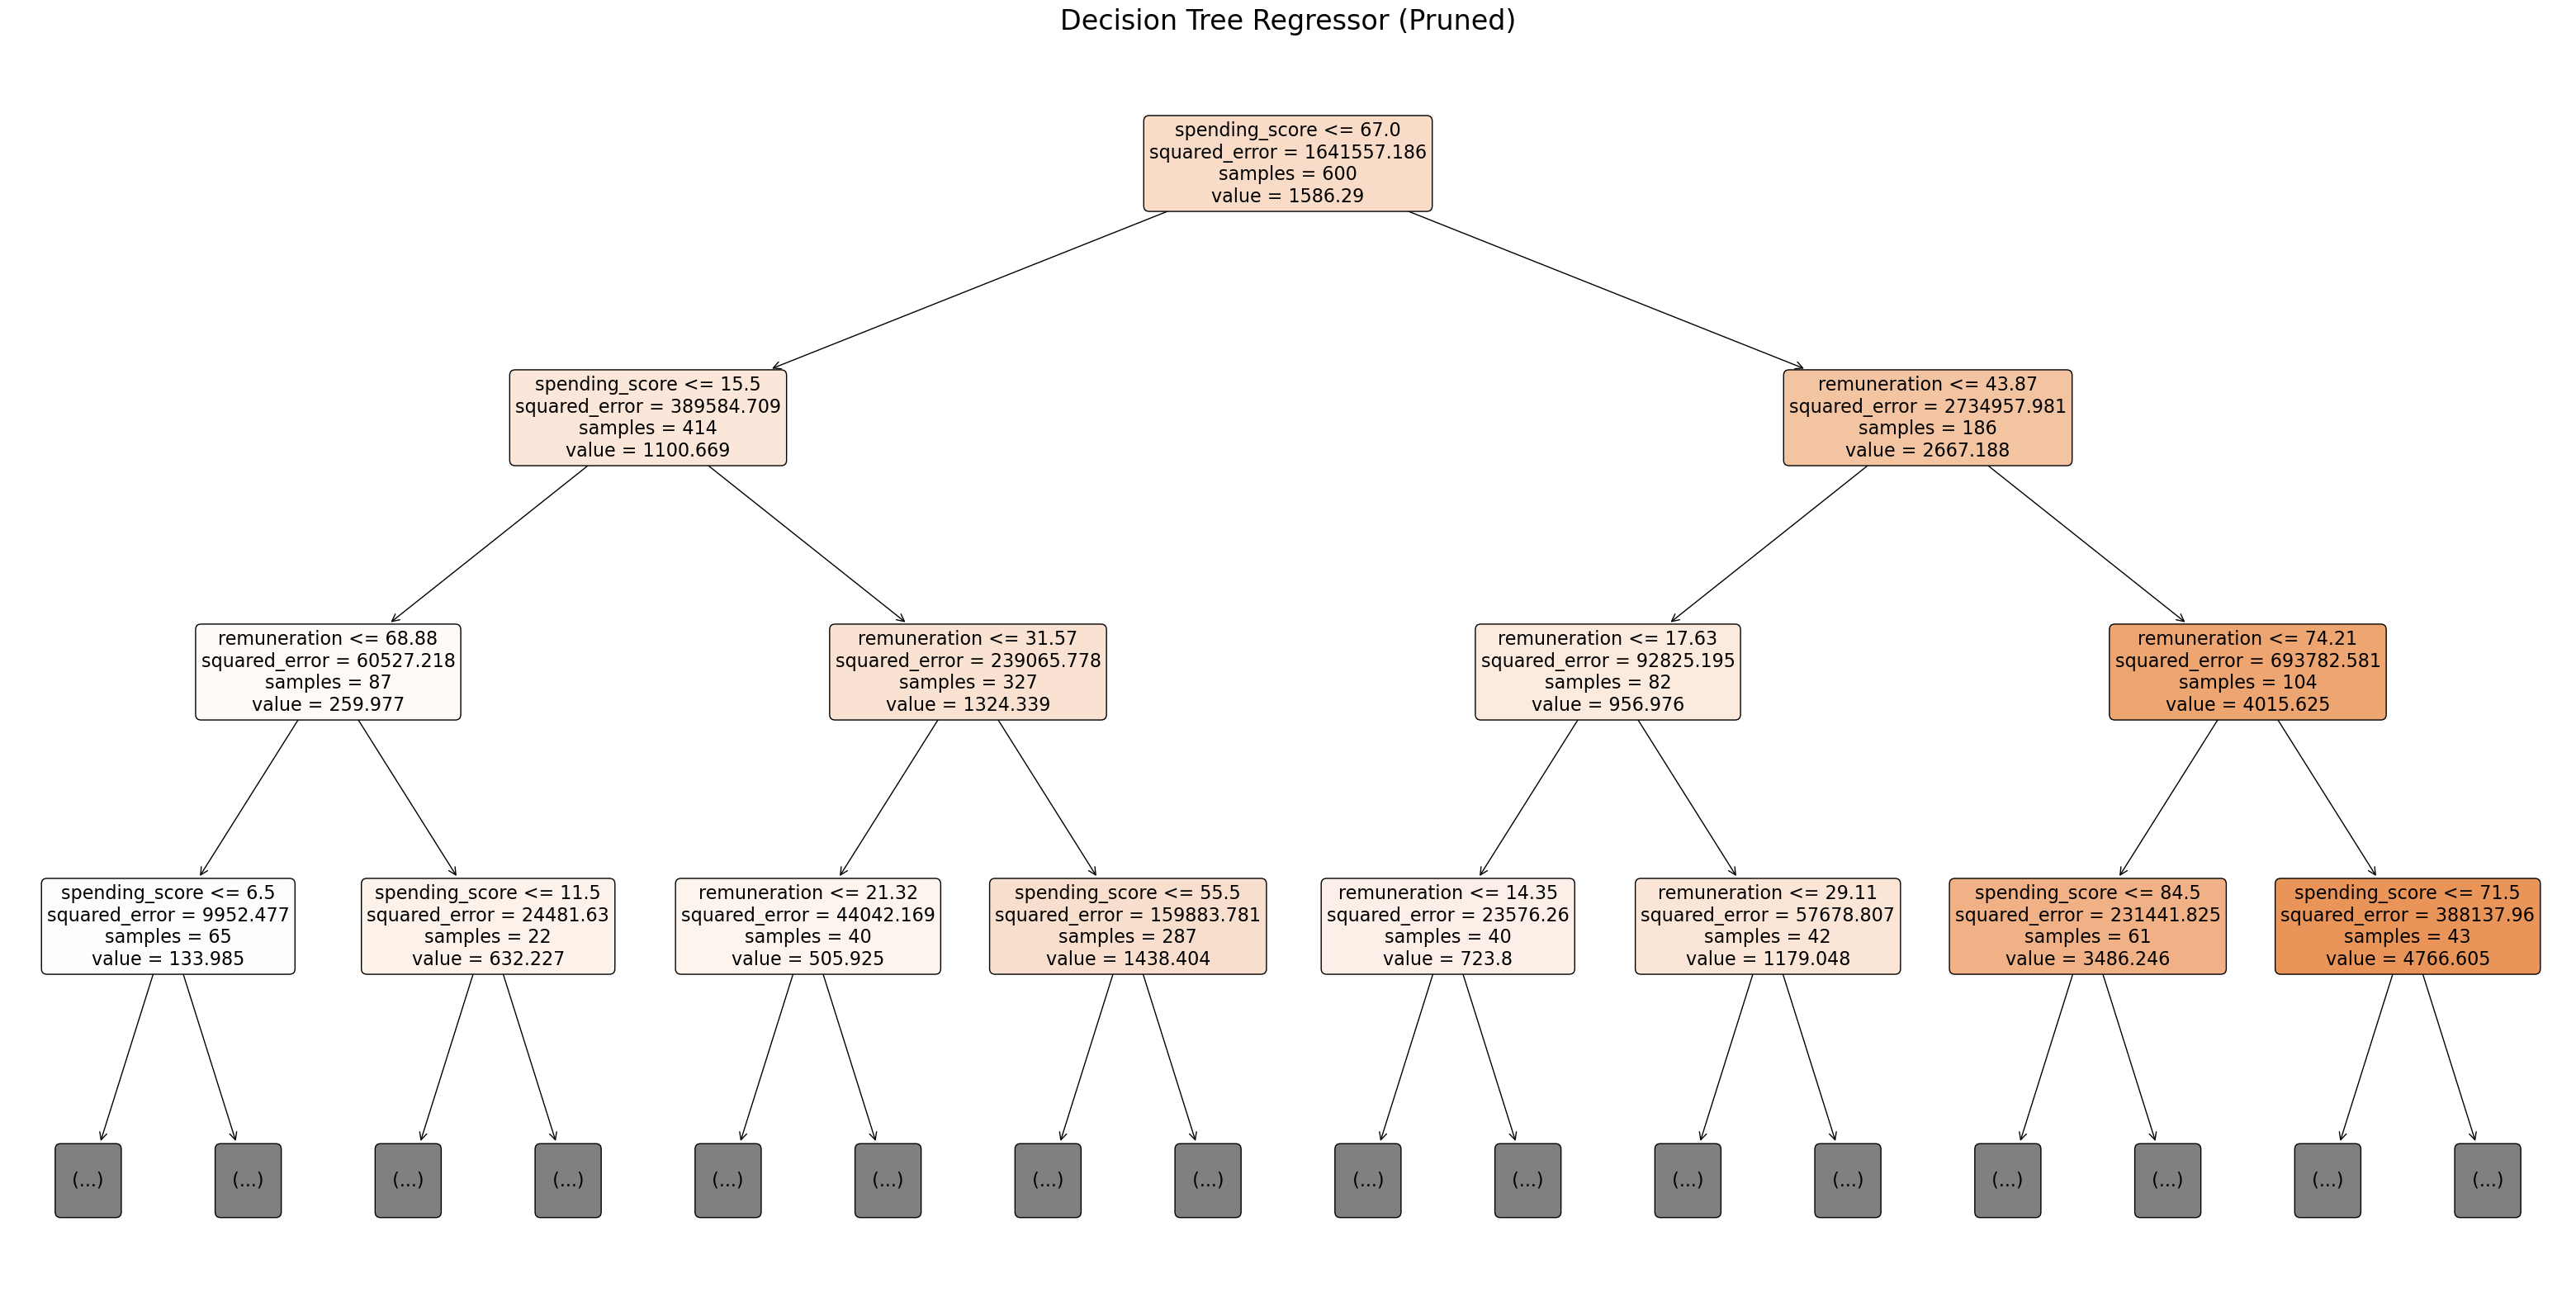

In [98]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
plot_tree(regressor, feature_names=X.columns, filled=True, max_depth=3, rounded=True, fontsize=16)
plt.title("Decision Tree Regressor (Pruned)",fontsize=24)
plt.show()

## 5. Discuss: Insights and observations

**Insights from the Tree**

Both spending_score and remuneration are key predictors, appearing frequently in the early splits of the tree. Higher income tends to be associated with higher loyalty points. The right branches of the tree—where spending_score exceeds 67 and remuneration is greater than 43.87—lead to higher predicted values, such as 4015, 4766 etc. In contrast, customers with lower spending and income are clustered on the left branches, with predicted values like 134, reinforcing the link between economic activity and loyalty point accumulation.

**Use Cases:**
- Target high-value customers (right-side branches) with premium rewards or exclusive offers.
- Identify low-engagement segments (left branches) to improve retention with basic incentives.

# Part 3: Clustering with *k*-means using Python

## 1. Load and explore the data

In [104]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [106]:
# Load the CSV file(s) as df3 and remove unnecessary columns
df3 = pd.read_csv('df_cleaned.csv', usecols=['remuneration', 'spending_score'])

# View DataFrame.
df3.head()

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [108]:
# Explore the data.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [110]:
df3.isnull().sum()

remuneration      0
spending_score    0
dtype: int64

In [112]:
# Descriptive statistics.
df3.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


**Observations:** Spending Score is evenly distributed as the Mean and Median are both 50. Remuneration has a wide spread.

## 2. Plot

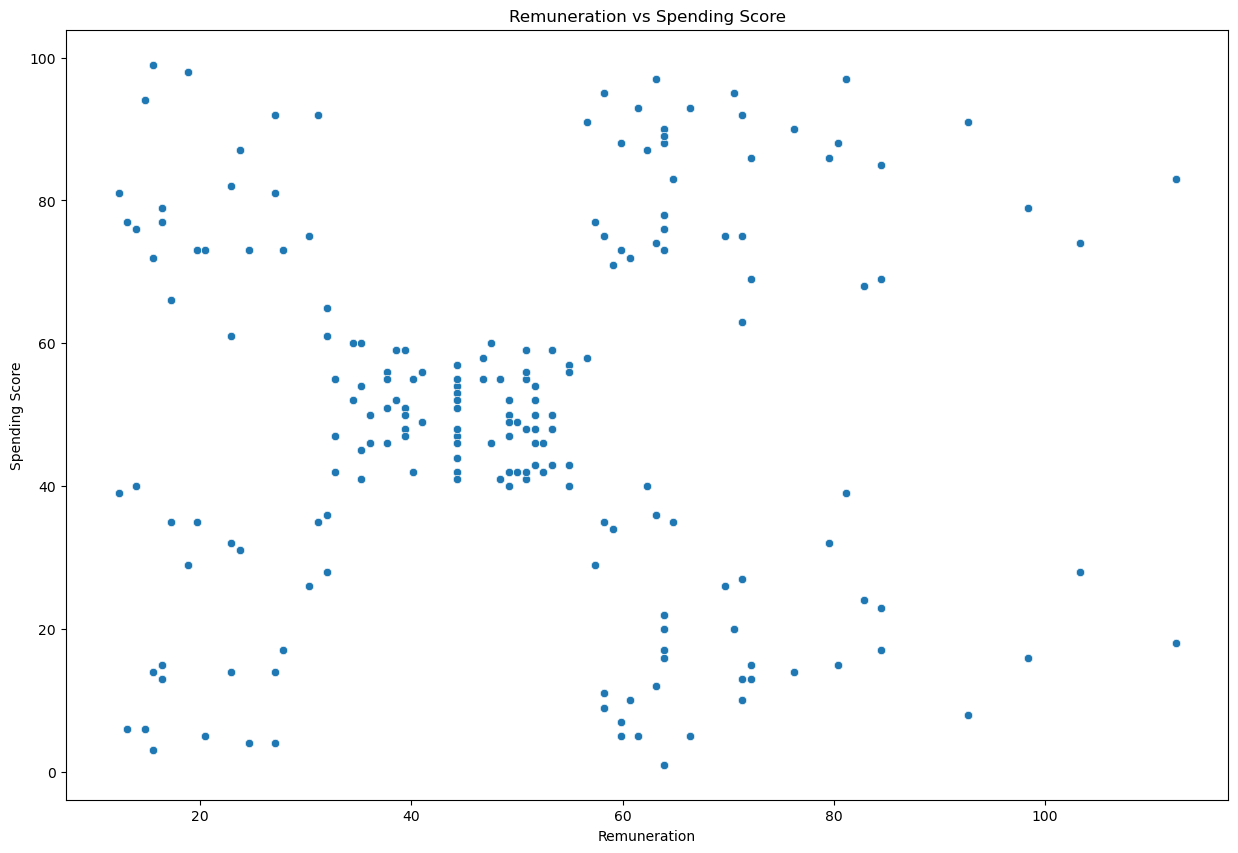

In [116]:
# Create a scatterplot with Seaborn.
sns.scatterplot(data=df3, x='remuneration', y='spending_score')
plt.title('Remuneration vs Spending Score')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.show()

From the scatterplot, 5 distinct clusters can be observed.

There are 
- Low income, low spenders
- Low income, high spenders
- Middle income, middle spenders (which forms the bulk of customers)
- High income, low spenders
- High income, high spenders


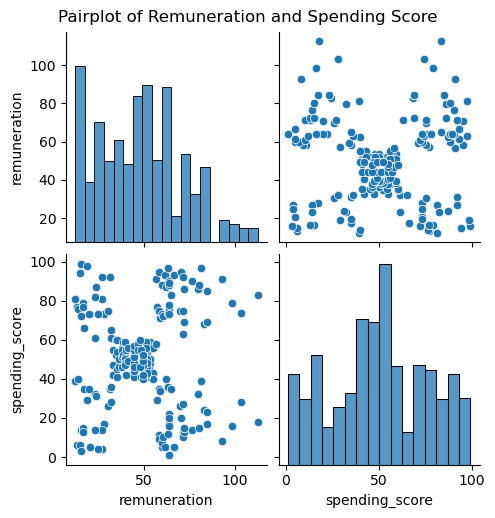

In [119]:
# Create a pairplot with Seaborn.
sns.pairplot(df3)
plt.suptitle("Pairplot of Remuneration and Spending Score", y=1.02)
plt.show()

**Observation:** Remuneration is right skewed, meaning most customers fall in the middle to lower income range. Spending Score is fairly evenly distributed. There is no strong linear relationship between the 2 factors, and, instead there are 5 visually distinct clusters, with the centre cluster being dense. 

## 3. Elbow and silhoutte methods

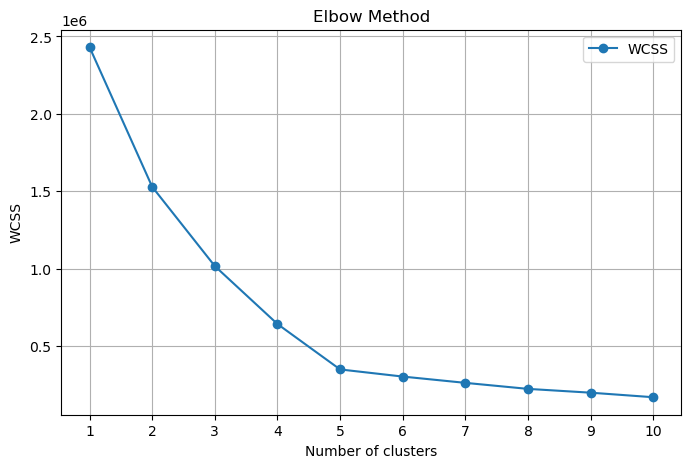

In [123]:
# Determine the number of clusters: Elbow method.
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.legend(['WCSS'])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

**Observation:** There’s a clear “elbow” or inflection point at k=5, where WCSS drops steeply up to 5 and then flattens out. After 5 clusters, reducing WCSS further gives diminishing returns.

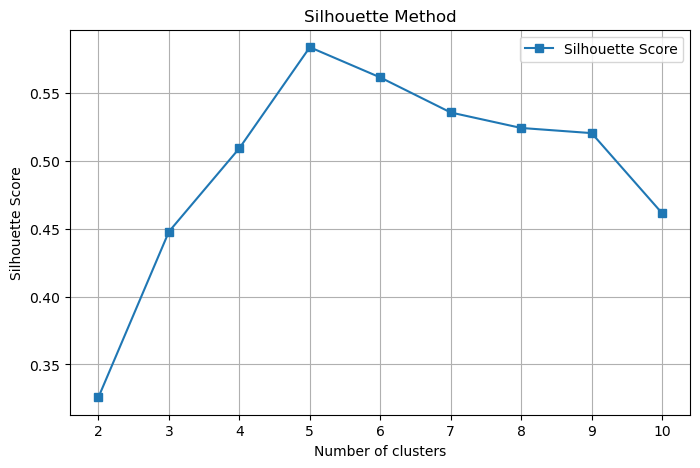

In [126]:
# Determine the number of clusters: Silhouette method.
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(df3)
    score = silhouette_score(df3, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='s')
plt.legend(['Silhouette Score'])
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


**Observation:** Peak silhouette score occurs at k=5. This means 5 clusters give the best cohesion and separation. After k=5, scores gradually decline.

## 4. Evaluate k-means model at different values of *k*

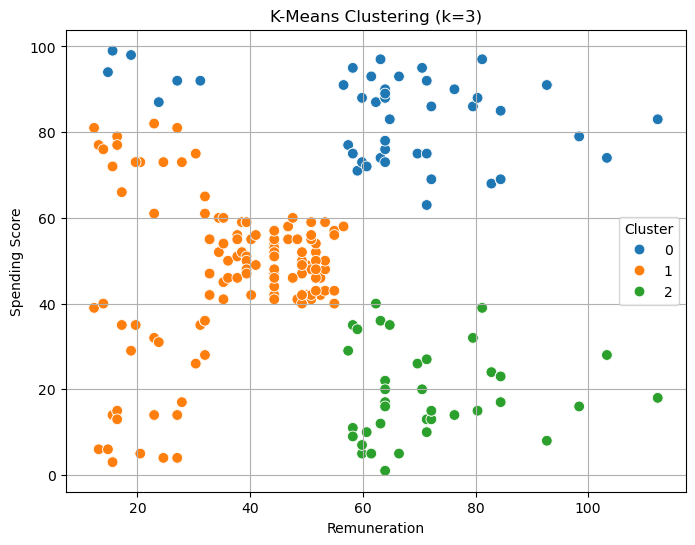

In [130]:
# Try with k = 3
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df3['cluster'] = kmeans.fit_predict(df3)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df3,
    x='remuneration', y='spending_score',
    hue='cluster',
    palette='tab10',
    s=60
)
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

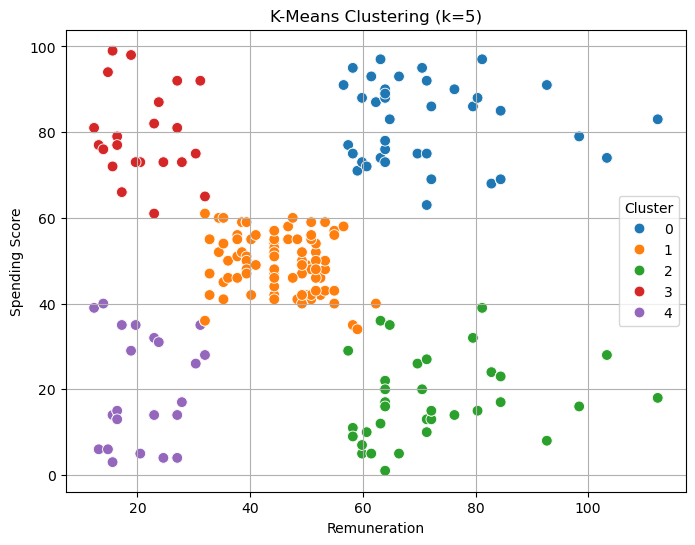

In [132]:
# Try with k = 5
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df3['cluster'] = kmeans.fit_predict(df3)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df3,
    x='remuneration', y='spending_score',
    hue='cluster',
    palette='tab10',
    s=60
)
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

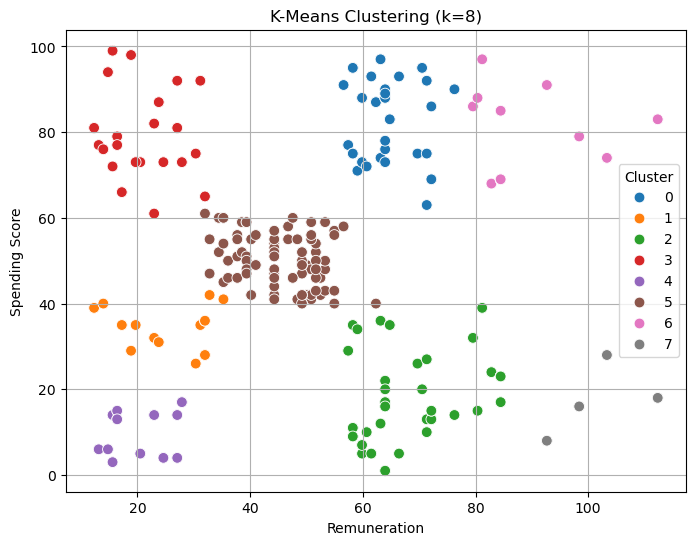

In [134]:
# Try with k = 8
k = 8
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df3['cluster'] = kmeans.fit_predict(df3)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df3,
    x='remuneration', y='spending_score',
    hue='cluster',
    palette='tab10',
    s=60
)
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Justification for choosing k = 3, 5 and 8**
1. k = 3.
Chosen to observe how the model performs with fewer, broader clusters. Useful to compare how much detail is lost when the model is underfitting.
2. k = 5.
Selected as the optimal number of clusters, based on visible elbow in WCSS plot, and highest silhouette score. 
3. k = 8.
Chosen to explore possible over-segmentation. Tests whether adding more clusters improves results or just splits natural groupings unnecessarily.

## 5. Fit final model and justify your choice

In [138]:
# Apply the final model.
# Final model with selected k = 5
kmeans_final = KMeans(n_clusters=5, init='k-means++', random_state=42)
df3['cluster'] = kmeans_final.fit_predict(df3)

In [140]:
# Check the number of observations per predicted class.
df3['cluster'].value_counts().sort_index()

cluster
0    356
1    774
2    330
3    269
4    271
Name: count, dtype: int64

## 6. Plot and interpret the clusters

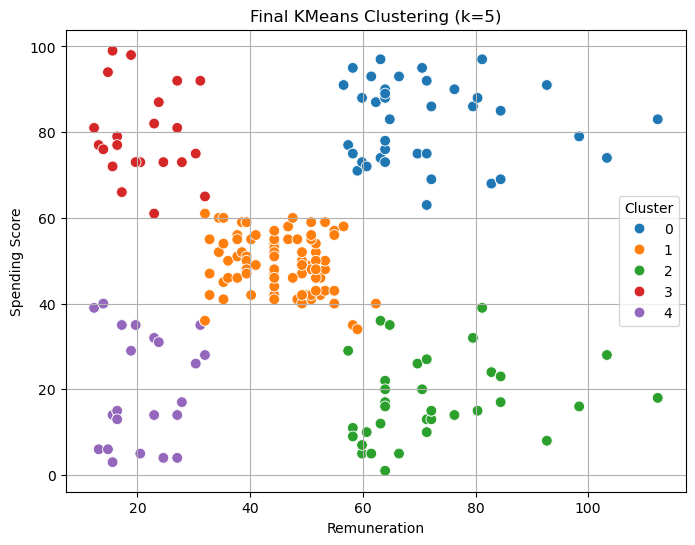

In [143]:
# Visualising the clusters.
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df3,
    x='remuneration', y='spending_score',
    hue='cluster',
    palette='tab10',
    s=60
)
plt.title('Final KMeans Clustering (k=5)')
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## 7. Discuss: Insights and observations

**Observations:**
The final k-means clustering with k=5 reveals 5 distinct customer segments. Cluster 0 includes high earners who spend a lot, ideal for targetting with premium items. Cluster 1 is the average customer group, with a large number of customers. Cluster 2 comprises high income individuals who spend less, suggesting upselling opportunities. Cluster 3 shows low earners with high spending, which we can possibly use retention strategies on. Cluster 4 consists of low income, low spending customers which are the least profitable customers.

# Part 4: NLP using Python

## 1. Load and explore the data

In [149]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /Users/annorang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annorang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
# Load the CSV file(s) as df4 and remove unnecessary columns
df4 = pd.read_csv('df_cleaned.csv', usecols=['review', 'summary'])

# View DataFrame.
df4.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [153]:
# Explore data set.
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [155]:
# Determine if there are any missing values.
df4.isnull().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [158]:
# Review: Change all to lower case
df4['review'] = df4['review'].astype(str).str.lower()

In [160]:
# Summary: Change all to lower case
df4['summary'] = df4['summary'].astype(str).str.lower()

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [163]:
# Replace all the punctuations in review column.
import string
df4['review'] = df4['review'].str.replace(f"[{string.punctuation}]", "", regex=True)

# View output.
df4.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon master's screen from...
2,nice art nice printing why two panels are fil...,"pretty, but also pretty useless"
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [165]:
# Replace all the puncuations in summary column.
df4['summary'] = df4['summary'].str.replace(f"[{string.punctuation}]", "", regex=True)

# View output.
df4.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


### 2c) Drop duplicates in both columns

In [168]:
# Drop duplicates in both columns.
df4.drop_duplicates(subset=['review', 'summary'], inplace=True)

# View DataFrame.
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1961 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   1961 non-null   object
 1   summary  1961 non-null   object
dtypes: object(2)
memory usage: 46.0+ KB


Note: No need to drop duplicates in the summary column, as many entries use similar wording to summarise different reviews but aren't actual duplicates.

## 3. Tokenise and create wordclouds

In [172]:
# Create new DataFrame (copy DataFrame).
df5 = df4.copy()

# View DataFrame.
df5.head()

,review,summary
0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,an open letter to galeforce9\n\nyour unpainted...,another worthless dungeon masters screen from ...
2,nice art nice printing why two panels are fil...,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm...,five stars
4,as my review of gf9s previous screens these we...,money trap


In [174]:
print(df5.columns)

Index(['review', 'summary'], dtype='object')


In [180]:
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

df5['review_tokens'] = df5['review'].astype(str).apply(tokenizer.tokenize)
df5['summary_tokens'] = df5['summary'].astype(str).apply(tokenizer.tokenize)

In [182]:
# Review: Create a word cloud.
# Join all tokens into one text
review_text = ' '.join([' '.join(tokens) for tokens in df5['review_tokens']])

# Create WordCloud
review_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)

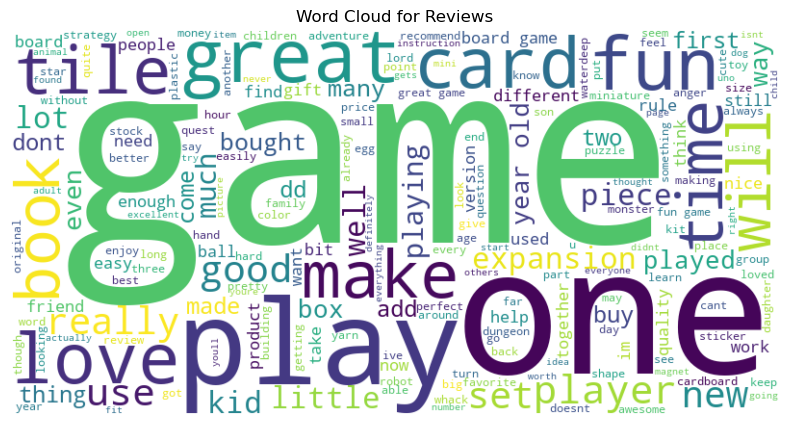

In [184]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(10, 5))
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

**Observations:** Varied language appears, with frequent terms like love, good, great, fun.

In [187]:
# Summary: Create a word cloud.
# Join all tokens into one text
summary_text = ' '.join([' '.join(tokens) for tokens in df5['summary_tokens']])

# Create WordCloud
summary_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(summary_text)

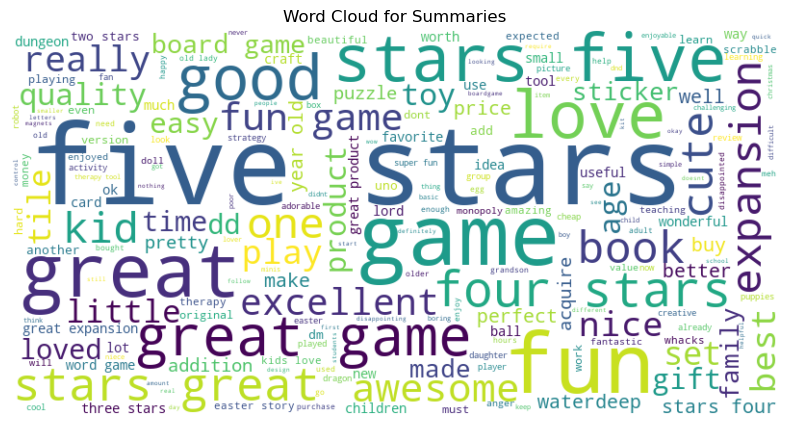

In [189]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(10, 5))
plt.imshow(summary_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Summaries')
plt.show()

**Observation:** Words like five, stars, fun, great, good dominate, which shows that summaries are highly positive and focus on giving praise or ratings.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [193]:
# Determine the frequency distribution.

# Flatten the list of all tokens in reviews
all_review_words = [word for tokens in df5['review_tokens'] for word in tokens]

# Frequency distribution
freq_dist = FreqDist(all_review_words)
freq_dist.most_common(10)  # View top 10

[('the', 5451),
 ('and', 3233),
 ('to', 3162),
 ('a', 3160),
 ('of', 2488),
 ('i', 2090),
 ('it', 2083),
 ('is', 1782),
 ('this', 1776),
 ('game', 1671)]

### 4b) Remove alphanumeric characters and stopwords

In [196]:
# Delete all the alpanum.
stop_words = set(stopwords.words('english'))

# Remove non-alphabetic and stopwords
df5['clean_tokens'] = df5['review_tokens'].apply(
    lambda tokens: [word for word in tokens if word.isalpha() and word not in stop_words]
)

df5[['clean_tokens']].head()

,clean_tokens
0,"[comes, dms, screen, space, screen, absolute, ..."
1,"[open, letter, unpainted, miniatures, bad, spe..."
2,"[nice, art, nice, printing, two, panels, fille..."
3,"[amazing, buy, bought, gift, new, dm, perfect]"
4,"[review, previous, screens, completely, unnece..."


### 4c) Create wordcloud without stopwords

In [199]:
# Create a wordcloud without stop words.

# Flatten cleaned tokens
clean_words = [word for tokens in df5['clean_tokens'] for word in tokens]

# Generate word cloud
clean_text = ' '.join(clean_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

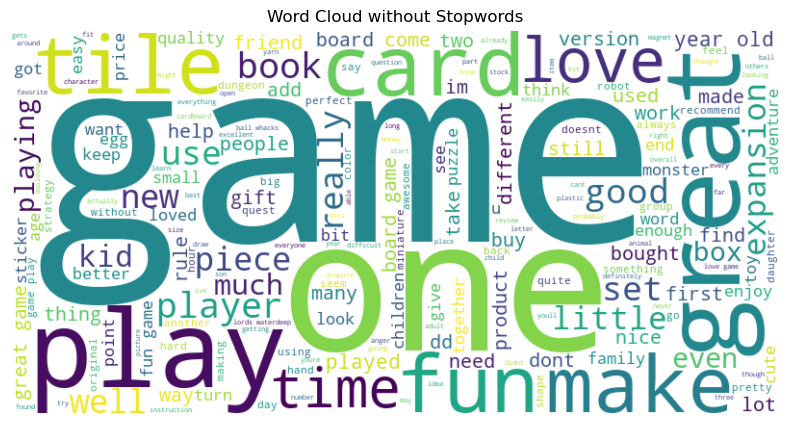

In [201]:
# Plot the wordcloud image.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud without Stopwords")
plt.show()

### 4d) Identify 15 most common words and polarity

In [204]:
# Determine the 15 most common words.
# Frequency distribution for cleaned tokens
fdist_clean = FreqDist(clean_words)
common_words = fdist_clean.most_common(15)

# Display words with sentiment polarity
for word, count in common_words:
    polarity = TextBlob(word).sentiment.polarity
    print(f"{word}: Count = {count}, Polarity = {polarity}")

game: Count = 1671, Polarity = -0.4
great: Count = 580, Polarity = 0.8
fun: Count = 552, Polarity = 0.3
one: Count = 530, Polarity = 0.0
play: Count = 502, Polarity = 0.0
like: Count = 414, Polarity = 0.0
love: Count = 323, Polarity = 0.5
really: Count = 319, Polarity = 0.2
get: Count = 319, Polarity = 0.0
cards: Count = 301, Polarity = 0.0
tiles: Count = 297, Polarity = 0.0
time: Count = 291, Polarity = 0.0
good: Count = 289, Polarity = 0.7
would: Count = 280, Polarity = 0.0
book: Count = 273, Polarity = 0.0


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [207]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [209]:
# Determine polarity of both columns. 
df5['review_polarity'] = df5['review'].apply(generate_polarity)
df5['summary_polarity'] = df5['summary'].apply(generate_polarity)

# View output.
df5[['review_polarity', 'summary_polarity']].head()

,review_polarity,summary_polarity
0,-0.036111,0.15
1,0.035952,-0.80
2,0.116640,0.00
3,0.578788,0.00
4,-0.316667,0.00


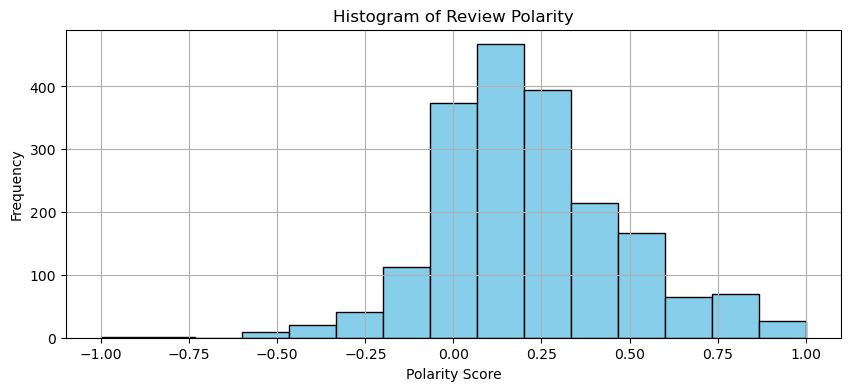

In [211]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(10,4))
plt.hist(df5['review_polarity'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Review Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Observation:** The polarity scores are more spread out, forming a near normal distribution centred slightly above 0. Most reviews are mildly positive, with fewer extreme scores on either end. 

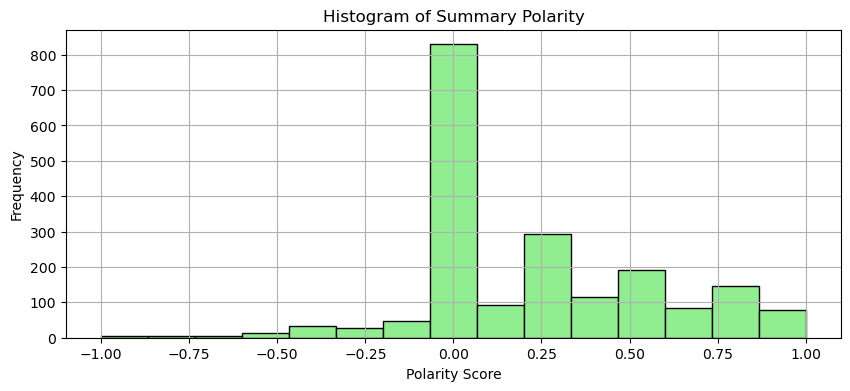

In [214]:
# Summary: Create a histogram plot with bins = 15.

# Histogram of sentiment score
plt.figure(figsize=(10,4))
plt.hist(df5['summary_polarity'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Histogram of Summary Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Observation:** Most summary polarity scores are close to 0, indicating neutral sentiment. There is a strong right skew, with many positive scores between 0.2 and 1.0. Very few summaries have negative sentiments.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [218]:
# Top 20 negative reviews.
df5[['review', 'review_polarity']].sort_values(by='review_polarity').head(20)

,review,review_polarity
208,booo unles you are patient know how to measur...,-1.000000
182,incomplete kit very disappointing,-0.780000
1804,im sorry i just find this product to be boring...,-0.583333
364,one of my staff will be using this game soon s...,-0.550000
1524,expensive for what you get,-0.500000
117,i bought this as a christmas gift for my grand...,-0.500000
230,i found the directions difficult,-0.500000
290,instructions are complicated to follow,-0.500000
301,difficult,-0.500000
227,this was a gift for my daughter i found it di...,-0.500000


In [220]:
# Top 20 negative summaries.
df5[['summary', 'summary_polarity']].sort_values(by='summary_polarity').head(20)

,summary,summary_polarity
208,boring unless you are a craft person which i am,-1.000000
21,the worst value ive ever seen,-1.000000
829,boring,-1.000000
1166,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
793,disappointed,-0.750000
1620,disappointed,-0.750000
144,disappointed,-0.750000
631,disappointed,-0.750000
363,promotes anger instead of teaching calming met...,-0.700000


In [222]:
# Top 20 positive reviews.
df5[['review', 'review_polarity']].sort_values(by='review_polarity', ascending=False).head(20)

,review,review_polarity
790,perfect,1.0
1726,excellent toy to simulate thought,1.0
194,awesome gift,1.0
1967,perfect for tutoring my grandson in spelling,1.0
1177,awesome addition to my rpg gm system,1.0
1168,best set buy 2 if you have the means,1.0
524,perfect just what i ordered,1.0
1715,awesome toy,1.0
1720,it is the best thing to play with and also min...,1.0
621,wonderful for my grandson to learn the resurre...,1.0


In [224]:
# Top 20 positive summaries.
df5[['summary', 'summary_polarity']].sort_values(by='summary_polarity', ascending=False).head(20)

,summary,summary_polarity
1028,one of the best,1.0
1935,excellent,1.0
815,one of the best games ever,1.0
1630,awesome learning tool,1.0
163,he was very happy with his gift,1.0
1170,best orcs from wotc,1.0
1388,awesome expansion,1.0
1078,perfect gift,1.0
140,awesome sticker activity for the price,1.0
1171,awesome,1.0


In [234]:
# Use Vader to get an additional outlook on sentiments
import nltk
nltk.download('vader_lexicon')

# Import
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/annorang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [228]:
vader = SentimentIntensityAnalyzer()

In [230]:
# Function to get compound score
def get_vader_score(text):
    if isinstance(text, str):
        return vader.polarity_scores(text)['compound']
    else:
        return None

# Apply to review column
df5['vader_compound'] = df5['review'].apply(get_vader_score)

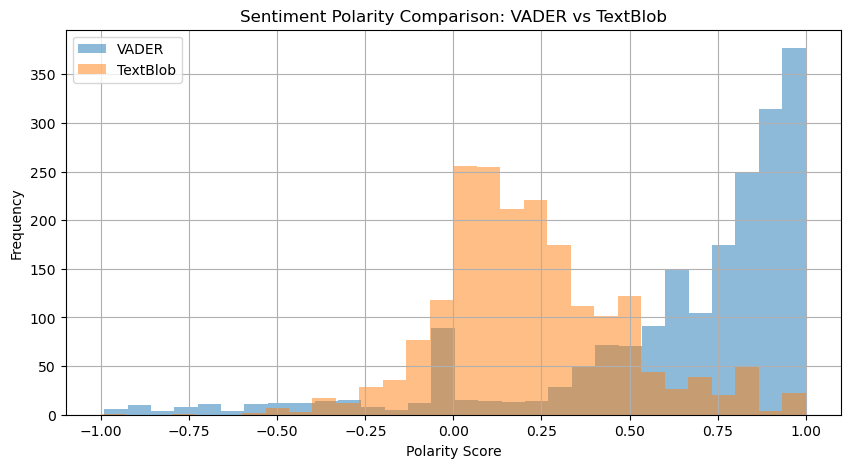

In [232]:
plt.figure(figsize=(10, 5))
plt.hist(df5['vader_compound'], bins=30, alpha=0.5, label='VADER')
plt.hist(df5['review_polarity'], bins=30, alpha=0.5, label='TextBlob')
plt.legend()
plt.title("Sentiment Polarity Comparison: VADER vs TextBlob")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**Observation:** VADER scores are more heavily skewed towards strong positivity. Most VADER compound scores are above 0.5, with a large spike around 0.9-1.0. This suggests that VADER interprets many reviews as highly positive. On the other hand, TextBlob shows a more moderate and neutral distribution. We can see that TextBlob is stricter in its identification of sentiments, whilst VADER is more optimistic. 

## 7. Discuss: Insights and observations

**Observations:** 
- Positive feedback emphasizes product enjoyment and value, especially for kids and family use.
- Negative feedback highlights usability issues and unmet expectations, suggesting room for product or messaging improvement.
- Review content is longer and descriptive, while summaries tend to be short but showing more emotions.